In [1]:
import pandas as pd 
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
vmd_path = 'VMD_Data'

all_pred = []
all_true = []
for file_name in os.listdir(os.path.join(vmd_path,'has_seasonality')):
    if len(file_name.split('_')) == 3:
        df = pd.read_csv(os.path.join(vmd_path,'has_seasonality',file_name))
        all_pred.append(np.array(df['pred']))
        all_true.append(np.array(df['true']))
        
for file_name in os.listdir(os.path.join(vmd_path,'no_seasonality')):
    if len(file_name.split('_')) == 3:
        df = pd.read_csv(os.path.join(vmd_path,'no_seasonality',file_name))
        all_pred.append(np.array(df['pred']))
        all_true.append(np.array(df['true']))

In [3]:
# 数据还原
pred_seq = np.array(all_pred).sum(0)
true_seq = np.array(all_true).sum(0)

# 原始数据
flow_out_mean, flow_out_std, flow_out_normalized = pickle.load(open('raw_data.pkl','rb'))

# 测试数据
raw_seq = flow_out_normalized[-len(pred_seq):]

MAE=0.225321003906446
RMSE=0.3178775218780138
MSE=0.10104611891530715
MAPE=122.22%
      Raw Sequence  Predicted Sequence
0         1.495596            1.559793
1         0.608853            0.871754
2         0.826015            0.849403
3         0.482176            0.301380
4         0.699337            0.588451
...            ...                 ...
1158     -1.110342           -1.244857
1159     -1.110342           -1.226538
1160     -1.110342           -1.194120
1161     -1.110342           -1.252478
1162     -1.110342           -1.270441

[1163 rows x 2 columns]


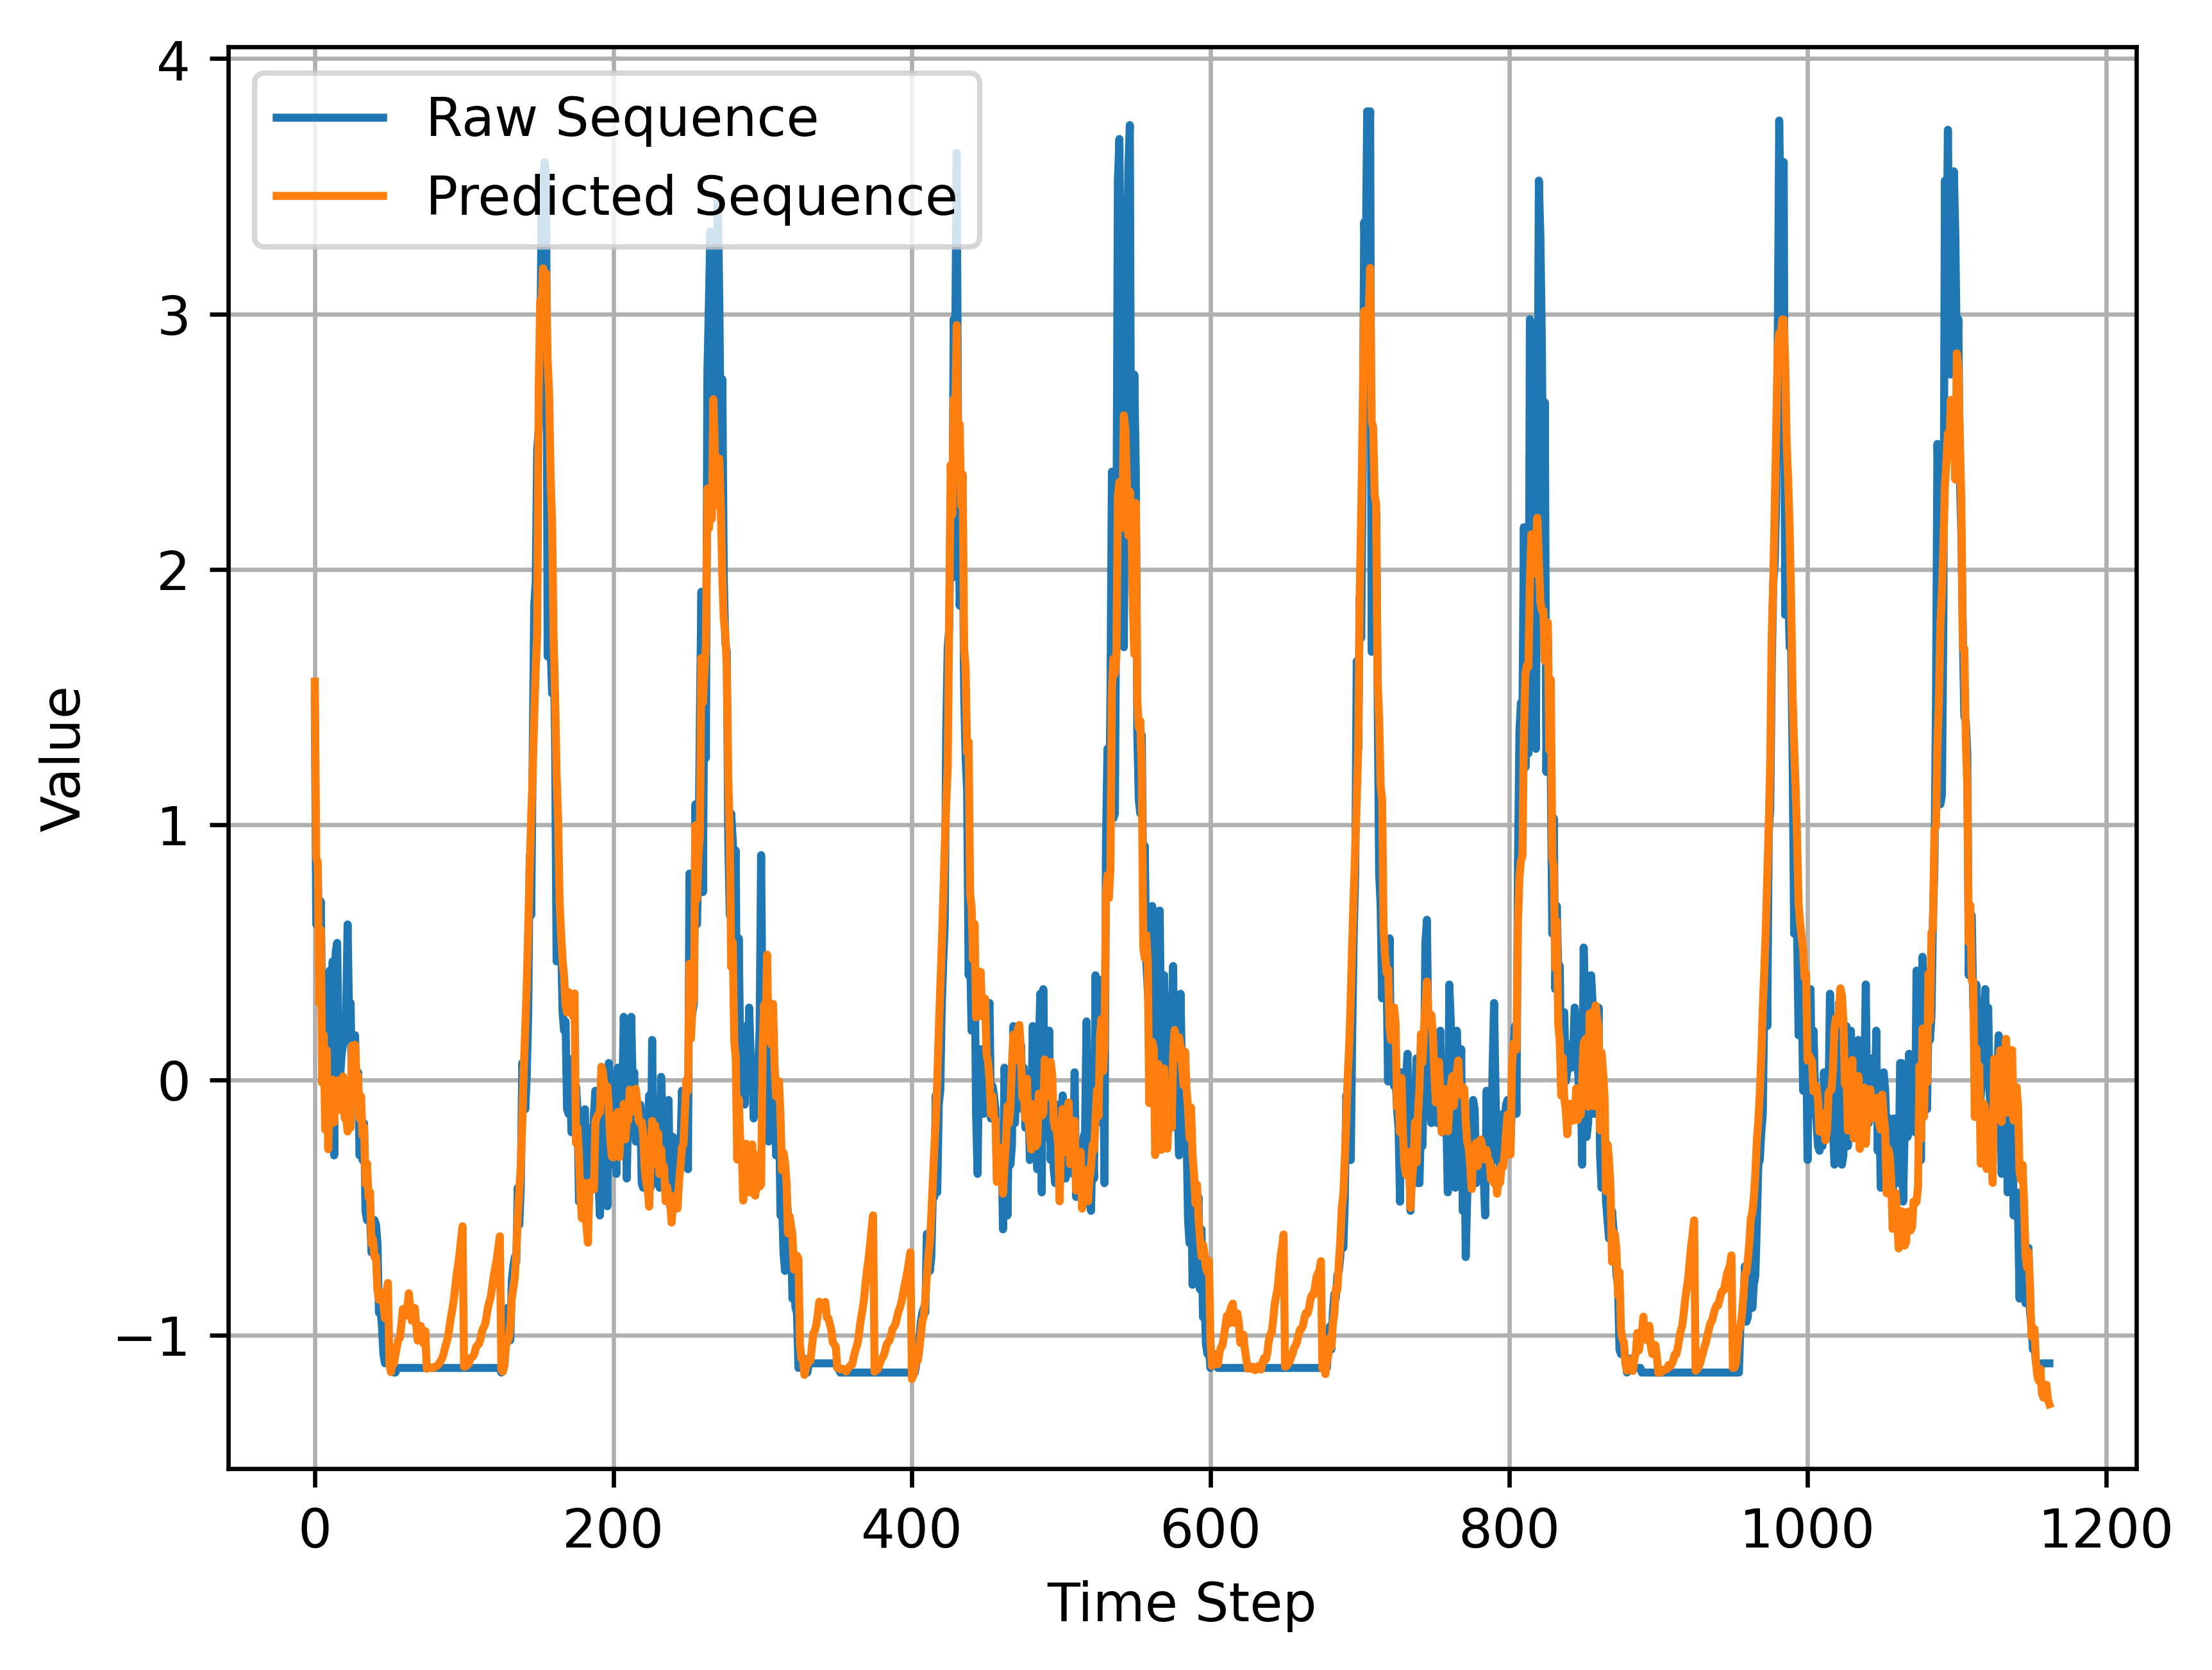

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# 计算MAE和RMSE
mae = mean_absolute_error(raw_seq, pred_seq)
rmse = mean_squared_error(raw_seq, pred_seq, squared=False)
print("MAE={}".format(mae))
print("RMSE={}".format(rmse))

# 计算MSE
mse = mean_squared_error(raw_seq, pred_seq)
print("MSE={}".format(mse))

# 计算MAPE
def mean_absolute_percentage_error(y_true, y_pred):return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(raw_seq, pred_seq)
print("MAPE={:.2f}%".format(mape))

# 生成拟合表格
df = pd.DataFrame({'Raw Sequence': raw_seq, 'Predicted Sequence': pred_seq})
print(df)

# 绘制预测值与真实值的拟合图
plt.figure(dpi=600)
plt.plot(raw_seq, label='Raw Sequence')
plt.plot(pred_seq, label='Predicted Sequence')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# 创建保存图片的文件夹
import os
save_folder = 'visual& final result'
os.makedirs(save_folder, exist_ok=True)

# 保存图片
plt.savefig(os.path.join(save_folder, 'fitting_plot.png'))
plt.show()
# 保存表格文件
table_path = os.path.join(save_folder, 'prediction_table.csv')
df.to_csv(table_path, index=False)

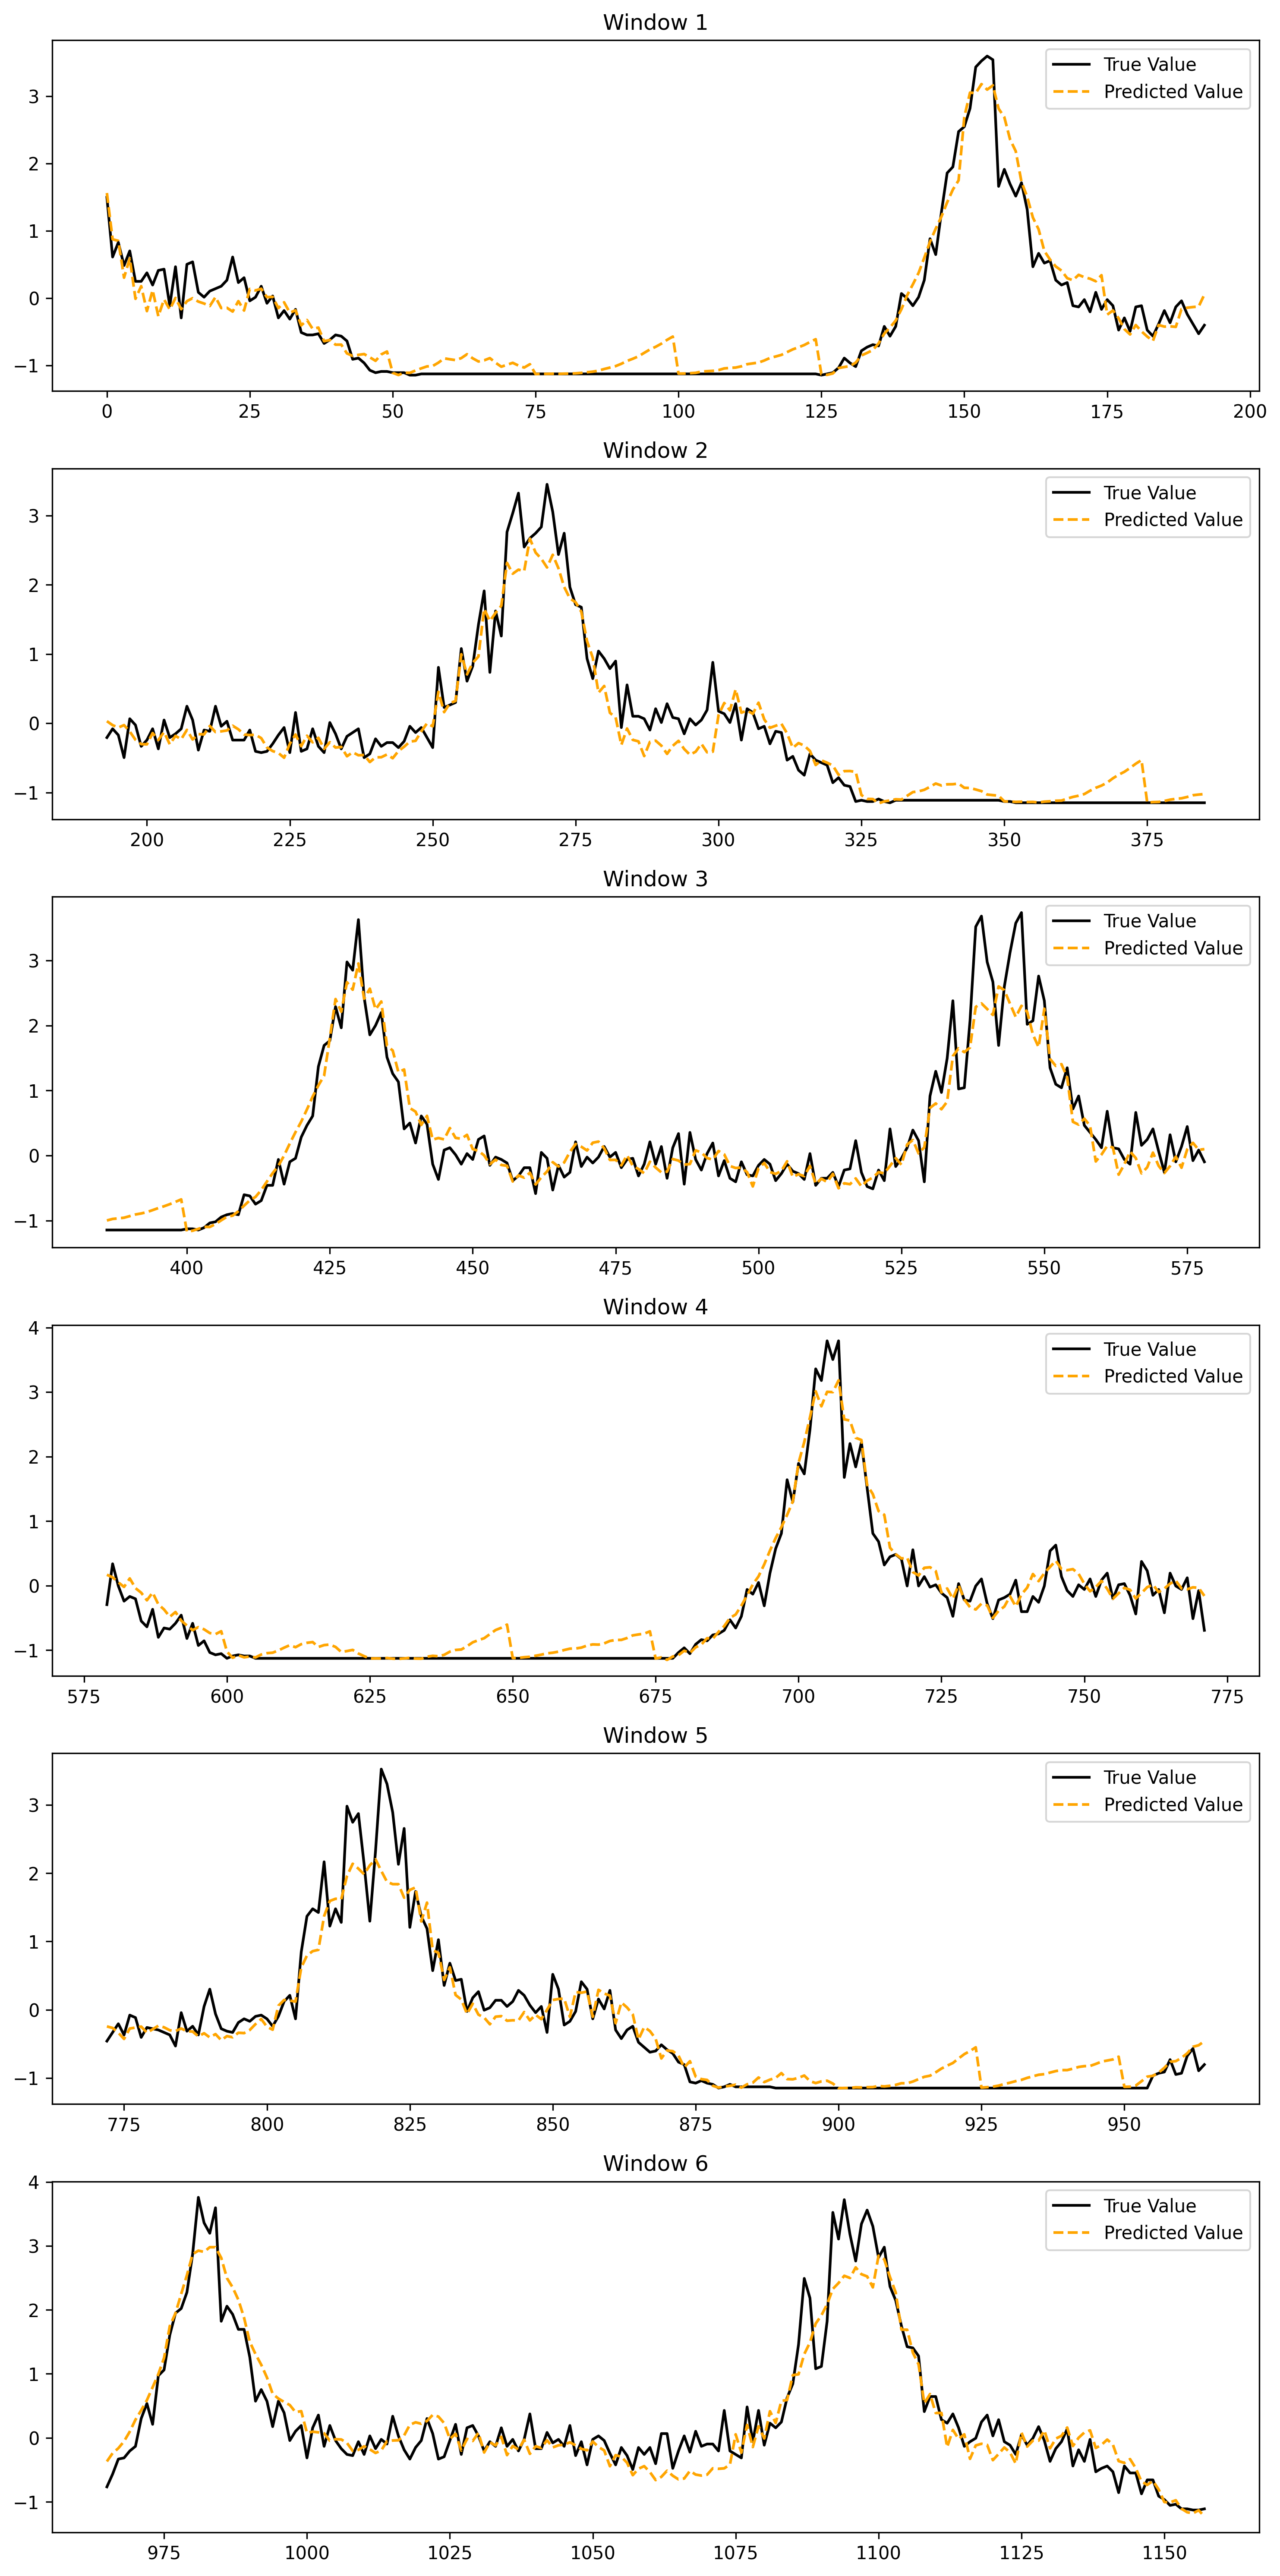

In [24]:
# 读取数据
data = pd.read_csv(r'C:\Users\Lenovo\Desktop\code\visual& final result\prediction_table.csv')

# 分割数据为四个窗口
window_size = len(data) // 6
windows = [data[i * window_size: (i + 1) * window_size] for i in range(6)]

# 创建画布和子图
fig, axs = plt.subplots(6, figsize=(10, 20), dpi=800)

# 绘制每个窗口的拟合曲线
for i, window in enumerate(windows):
    axs[i].plot(window.index, window['Raw Sequence'], label='True Value')
    axs[i].plot(window.index, window['Predicted Sequence'], label='Predicted Value')
    axs[i].set_title(f'Window {i+1}')
    axs[i].legend()

# 调整子图之间的间距
fig.tight_layout()

# 保存图像
plt.savefig(r'C:\Users\Lenovo\Desktop\code\visual& final result\plot.png', dpi=800)

# 显示图形
plt.show()